In [12]:
#
# Changes
# data -> dataset
# 'class' column -> 'target' column
# 'class' on github has [0..4] but 'target' on our dataset has [0..1]
#

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
from sklearn import model_selection
from keras.utils.np_utils import to_categorical

# Reading dataset from CSV file

In [4]:
filename = 'heart.csv'

dataset = pd.read_csv(filename)

In [5]:
# remove data with missing values ('?')
dataset = dataset[~dataset.isin(['?'])]

# drop rows with NaN values
dataset = dataset.dropna(axis=0)

# transform object types to numeric types
data = dataset.apply(pd.to_numeric)

In [6]:
print (dataset.shape)
print (dataset.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [7]:
# print stats about data using the describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


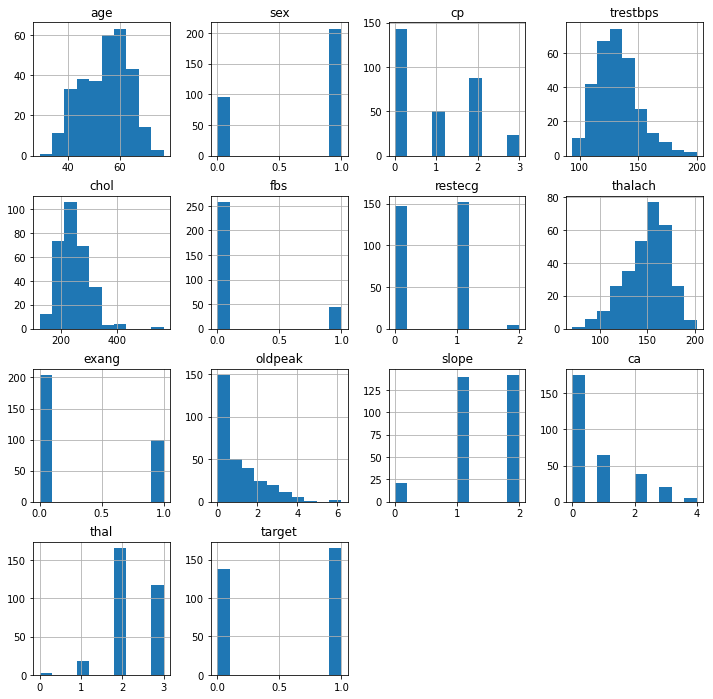

In [8]:
# plot histograms for each variable
dataset.hist(figsize = (12, 12))
plt.show()

# Create Training and Testing Datasets

In [9]:
# create X and Y datasets for training

X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [10]:
# convert the data to categorical labels

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
